In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import seaborn as sns
sns.set()

def smooth(lst, times=1):
    once = [lst[0]] + [.25*lst[x-1]+.5*lst[x]+.25*lst[x+1] for x in range(0, len(lst)-1)]
    if times == 1: return once
    else: return (smooth(once, times-1))

# READ IN FILES

In [48]:
# directory
data_file_path = "/Users/gandalf/Documents/coding/do_not_commit/capstone/"
website_file_path = '/Users/gandalf/Documents/coding/rczyrnik.github.io/capstone/'

df =  pd.read_pickle(data_file_path+'convo_df.pkl')
n=len(df)
df.head(2)

,first_message_uid,second_message_uid,len_convo,first_message_read,first_message_timestamp,first_message_text,first_message_len_char,first_message_len_word,first_message_date,first_message_year,first_message_day_of_year,first_message_month,first_message_day_of_month,first_message_week,first_message_day_of_week,first_message_day,first_message_hour,const2,response
02sjTzcsaO02omVxM8Xm,02omVxM8Xm,02sjTzcsaO,1,False,2017-09-11 02:41:19.188,Wya?,4,1,2017-09-11,2017,254,9,11,37,1,736583,2,1,0
07lVtClAEQ01iDVeaXl1,01iDVeaXl1,07lVtClAEQ,1,False,2017-09-06 20:03:30.419,Hey I'm looking for some roommates too have yo...,62,11,2017-09-06,2017,249,9,6,36,3,736578,20,1,0


# SPLIT INTO GOOD AND BAD DF

In [49]:
df_yes = df[df.response == 1]
df_no = df[df.response == 0]

n_yes = len(df_yes)
n_no = len(df_no)

# IDENTIFY COLUMNS

In [50]:
df.columns

Index(['first_message_uid', 'second_message_uid', 'len_convo',
       'first_message_read', 'first_message_timestamp', 'first_message_text',
       'first_message_len_char', 'first_message_len_word',
       'first_message_date', 'first_message_year', 'first_message_day_of_year',
       'first_message_month', 'first_message_day_of_month',
       'first_message_week', 'first_message_day_of_week', 'first_message_day',
       'first_message_hour', 'const2', 'response'],
      dtype='object')

# responses

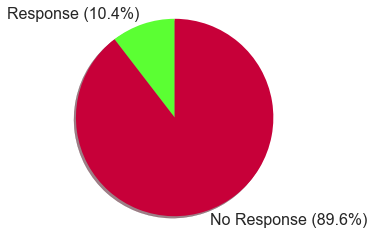

In [5]:
sizes = [n_yes, n_no]
labels = 'Response ({:.1f}%)'.format(100*n_yes/n), 'No Response ({:.1f}%)'.format(100*n_no/n)
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, textprops={'fontsize':16},
        shadow=True, startangle=90, colors=['#5BFF33', '#C70039'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig(website_file_path+"response_rate_pie.png")
plt.show()

# EVERYTHING!!!

# len_convo

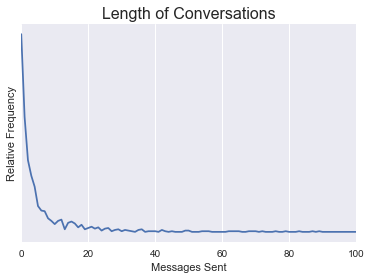

In [59]:
col = 'len_convo'

temp = pd.DataFrame((ax.hist(df[col], bins = range(2,300)))[0])
ax = temp.plot(kind='line')

y_ticks = ax.get_yticks()
ylabels = [round(x/n,2) for x in y_ticks]
ax.set_yticklabels(ylabels)

ax.set_ylabel("Relative Frequency")
ax.set_xlabel("Messages Sent")
ax.set_title("Length of Conversations", fontsize=16)
ax.set_xlim(0,100)
ax.legend_.remove()
plt.yticks([])

plt.savefig(website_file_path+"length_of_conversations.png")
plt.show()

# first_message_len_word

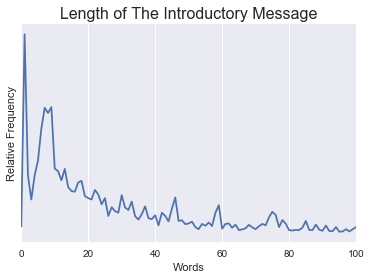

In [7]:
col = 'first_message_len_word'

temp = pd.DataFrame((ax.hist(df[col], bins = range(0,max(df[col]), 1)))[0])

ax = temp.plot(kind='line')


ax.set_ylabel("Relative Frequency")
ax.set_xlabel("Words")
ax.set_title("Length of The Introductory Message", fontsize=16)
ax.set_xlim(0,100)
ax.legend_.remove()
plt.yticks([])

plt.savefig(website_file_path+"length_of_first_message.png")

plt.show()

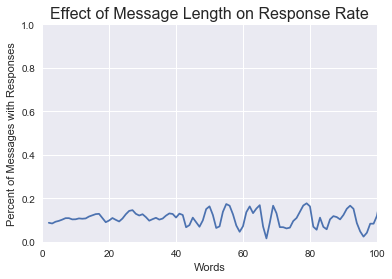

In [9]:
b = 1
temp = pd.DataFrame((ax.hist(df_yes[col], bins = range(0,max(df[col]), b)))[0])
temp['no'] = pd.DataFrame((ax.hist(df_no[col], bins = range(0,max(df[col]), b)))[0])
temp.columns = ['yes','no']
temp['total'] = temp.yes+temp.no
temp['pct'] = temp.yes/temp.total
smoothed = smooth(list(temp.pct),1)
smooth_df = pd.DataFrame(smoothed)
ax = smooth_df.plot(kind='line')

ax.set_ylabel("Percent of Messages with Responses")
ax.set_xlabel("Words")
ax.set_title("Effect of Message Length on Response Rate", fontsize=16)
ax.set_xlim(0,100)
ax.legend_.remove()
ax.set_ylim(0,1)
plt.savefig(website_file_path+"length_of_first_message_response_rate.png")
plt.show()

# first_message_day_of_year

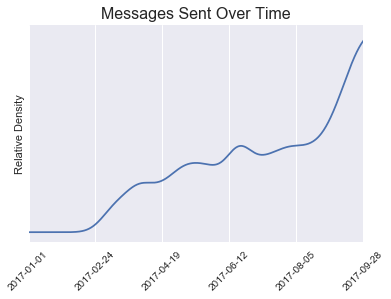

In [97]:
col = 'first_message_day_of_year'
ax = df[col].plot(kind='kde')

xlabels = [dt.date(2017,1,1) + dt.timedelta(x) for x in range(0, 360, 54)]
ax.set_xticklabels(xlabels)
plt.xticks(rotation=45)

ax.set_xlim(0,250)
ax.set_ylabel("Relative Density")
ax.set_xlabel("")
plt.yticks([])
plt.title("Messages Sent Over Time", fontsize=16)
plt.savefig(website_file_path+"first_message_day_of_year.png")
plt.show()

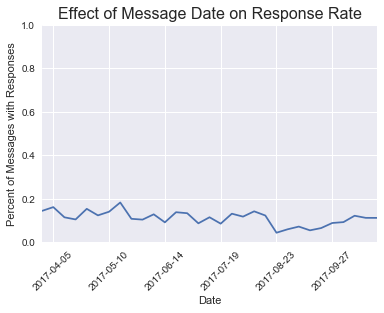

In [98]:
col = 'first_message_week'
temp = df.groupby(col).sum()
temp['pct'] = temp.response/temp.const2
temp.head()

ax = temp['pct'].plot(kind='line')
num_days = (max(df.first_message_date)-min(df.first_message_date)).days
xlabels = [min(df.first_message_date) + dt.timedelta(x) for x in range(0, num_days, int(num_days/6))]
ax.set_xticklabels(xlabels)
plt.xticks(rotation=45)

ax.set_ylabel("Percent of Messages with Responses")
ax.set_xlabel("Date")
ax.set_title("Effect of Message Date on Response Rate", fontsize=16)
ax.set_ylim(0,1)
# ax.legend_.remove()
plt.savefig(website_file_path+"first_message_day_of_year_response_rate.png")

plt.show()

# first_message_day_of_week

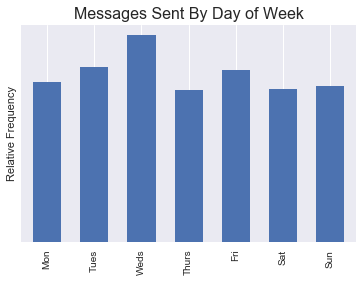

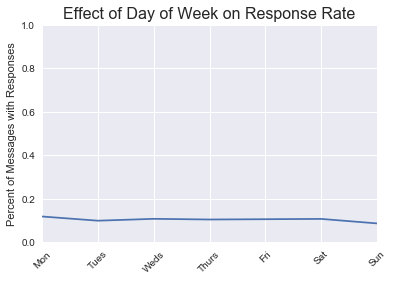

In [117]:
col = "first_message_day_of_week"
temp = df.groupby(col).count().first_message_timestamp
ax = temp.plot(kind='bar',width=.6)
x_labels = ["Mon","Tues","Weds","Thurs","Fri","Sat","Sun"]
ax.set_xticklabels(x_labels)

y_ticks = ax.get_yticks()
plt.yticks([])

ax.set_ylabel("Relative Frequency")
ax.set_xlabel("")
plt.title("Messages Sent By Day of Week", fontsize=16)
plt.savefig(website_file_path+"first_message_day_of_week.png")
plt.show()

temp = df.groupby(col).sum()
temp['pct'] = temp.response/temp.const2
temp.head()

ax = temp['pct'].plot(kind='line')

ax.set_xticklabels(xlabels)
plt.xticks(rotation=45)
x_labels = ["Mon","Tues","Weds","Thurs","Fri","Sat","Sun"]
ax.set_xticklabels(x_labels)
ax.set_ylabel("Percent of Messages with Responses")
ax.set_xlabel("")
ax.set_title("Effect of Day of Week on Response Rate", fontsize=16)
ax.set_ylim(0,1)
plt.savefig(website_file_path+"first_message_day_of_week_response_rate.png")
plt.show()

# first_message_hour

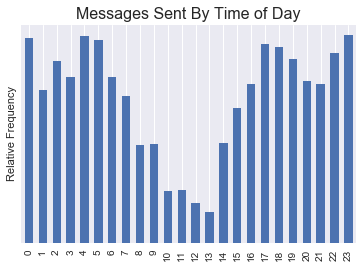

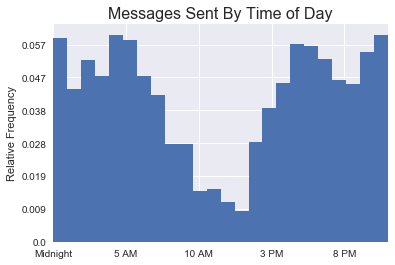

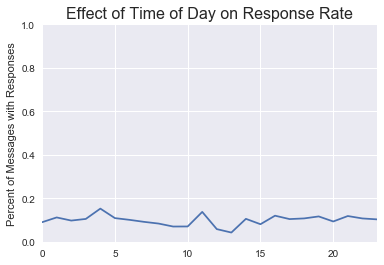

In [115]:
col = "first_message_hour"
temp = df.groupby(col).count().first_message_timestamp

ax = temp.plot(kind='bar',width=.6)

plt.yticks([])
ax.set_ylabel("Relative Frequency")
ax.set_xlabel("")
plt.yticks([])
plt.title("Messages Sent By Time of Day", fontsize=16)
plt.savefig(website_file_path+"first_message_time_of_day.png")
plt.show()

ax = df['first_message_hour'].plot(kind='hist',bins=24)
x_labels = ["Midnight", "5 AM", "10 AM", "3 PM","8 PM"]
ax.set_xticklabels(x_labels)
ax.set_xlim(0,23)

y_ticks = ax.get_yticks()


ylabels = [round(x/n,3) for x in y_ticks]
ax.set_yticklabels(ylabels)

ax.set_ylabel("Relative Frequency")
ax.set_xlabel("")
plt.title("Messages Sent By Time of Day", fontsize=16)
plt.savefig(website_file_path+"first_message_time_of_day.png")
plt.show()

temp = df.groupby(col).sum()
temp['pct'] = temp.response/temp.const2
temp.head()

ax = temp['pct'].plot(kind='line')

ax.set_ylabel("Percent of Messages with Responses")
ax.set_xlabel("")
ax.set_title("Effect of Time of Day on Response Rate", fontsize=16)
ax.set_ylim(0,1)
plt.savefig(website_file_path+"first_message_time_of_day_response_rate.png")
plt.show()

# first_message_day_of_month

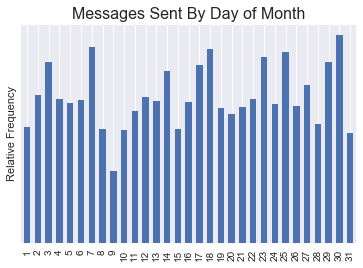

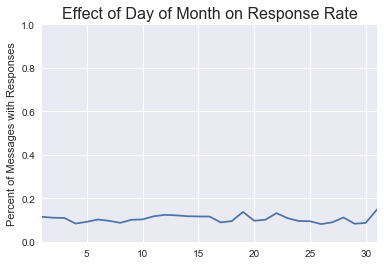

In [116]:
col = 'first_message_day_of_month'
temp = df.groupby(col).sum()

ax = temp.const2.plot(kind='bar',width=.6)

ax.set_ylabel("Relative Frequency")
ax.set_xlabel("")
plt.yticks([])
plt.title("Messages Sent By Day of Month", fontsize=16)
plt.savefig(website_file_path+col+".png")
plt.show()

temp = df.groupby(col).sum()
temp['pct'] = temp.response/temp.const2
temp.head()

ax = temp['pct'].plot(kind='line')

ax.set_ylabel("Percent of Messages with Responses")
ax.set_xlabel("")
ax.set_title("Effect of Day of Month on Response Rate", fontsize=16)
ax.set_ylim(0,1)
plt.savefig(website_file_path+col+"_response_rate.png")
plt.show()

In [ ]:
temp = user_df.groupby("created_day_of_month").count().created_date
ax = temp.plot(kind='bar',width=.6)

In [23]:
temp = df.groupby(['first_message_day_of_year','response']).count().const.unstack().fillna(0)
temp.columns = ['no','yes']
temp['total'] = temp.no+temp.yes
temp['percent'] = temp.yes/temp.total
temp.head()


,no,yes,total,percent
first_message_day_of_year,,,,
60,47.0,7.0,54.0,0.129630
61,17.0,3.0,20.0,0.150000
62,23.0,4.0,27.0,0.148148
63,27.0,7.0,34.0,0.205882
64,23.0,2.0,25.0,0.080000


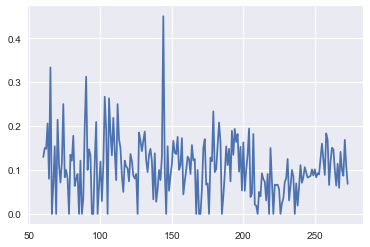

In [24]:
temp = df.groupby(['first_message_day_of_year','response']).count().const.unstack().fillna(0)
temp.columns = ['no','yes']
temp['total'] = temp.no+temp.yes
temp['percent'] = temp.yes/temp.total
plt.plot(temp.percent)
plt.show()

In [ ]:
def smooth(lst, times=1):
    once = [lst[0]] + [.25*lst[x-1]+.5*lst[x]+.25*lst[x+1] for x in range(0, len(lst)-1)]

    if times == 1:
        return once
    else:
        return (smooth(once, times-1))
    
def show_trend(feature_name):
    
    temp = df.groupby([feature_name,'response']).count().const.unstack().fillna(0)
    temp.columns = ['no','yes']
    temp['total'] = temp.no+temp.yes
    temp['percent'] = temp.yes/temp.total

    lst = smooth(list(temp.percent),20) 

    dates = list(pd.date_range(pd.to_datetime("03/01/2017"), periods=len(lst)))

    plt.plot(dates, lst)

    plt.ylabel("Percent Responding")
    plt.xlabel("Date")
    plt.title(feature_name, fontsize=16)
    plt.savefig(website_file_path+"response_rate_"+feature_name+".png")
    plt.show()
    
show_trend('created_day_of_year')   

In [ ]:
list(pd.date_range(pd.to_datetime("01/01/2000"), periods=10))

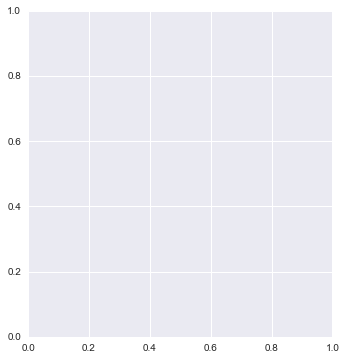

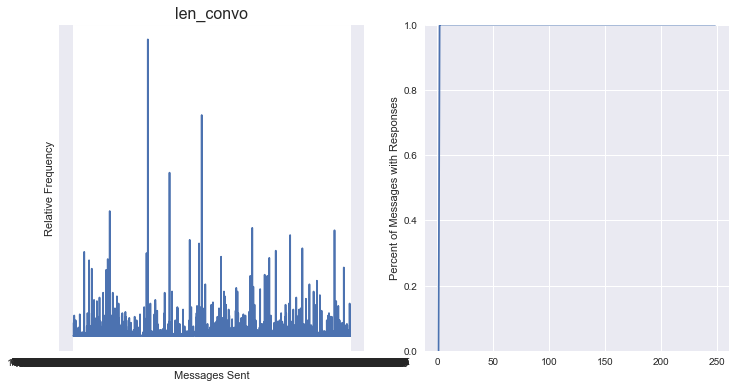

KeyboardInterrupt: 

In [94]:
def show_col(col):
    # get the percents
    temp = df.groupby(col).sum()
    temp['pct'] = temp.response/temp.const2
    
    # set up the figure
    fig = plt.figure(figsize=(12,6))

    # first graph
    ax1 = fig.add_subplot(121)
    ax1.plot(df[col])
    ax1.set_ylabel("Relative Frequency")
    ax1.set_xlabel("Messages Sent")
    ax1.set_title(col, fontsize=16)
    plt.yticks([])
    
    
    # second graph
    ax2 = fig.add_subplot(122)
    ax2.plot(temp['pct'])
    ax2.set_ylabel("Percent of Messages with Responses")
    ax1.set_xlabel("Messages Sent")
    ax2.set_ylim(0,1)

    plt.savefig(website_file_path+col+".png")
    plt.show()

columns = ['len_convo','first_message_len_char', 'first_message_len_word','first_message_year', 'first_message_day_of_year',
       'first_message_month', 'first_message_day_of_month',
       'first_message_week', 'first_message_day_of_week', 'first_message_day',
       'first_message_hour']
    
for col in columns: 
    show_col(col)
# show_col_reponse_rate(col)

In [ ]:
temp = df.groupby(['first_message_month','response']).count().const.unstack().fillna(0)
temp.columns = ['no','yes']
temp['total'] = temp.no+temp.yes
temp['percent'] = temp.yes/temp.total
plt.plot(temp.percent)
plt.ylim([0,.2])
plt.show()

In [ ]:
df.columns